<a href="https://colab.research.google.com/github/Choihia/hitech_OpenCV/blob/main/Webcam_FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

Saved to photo.jpg


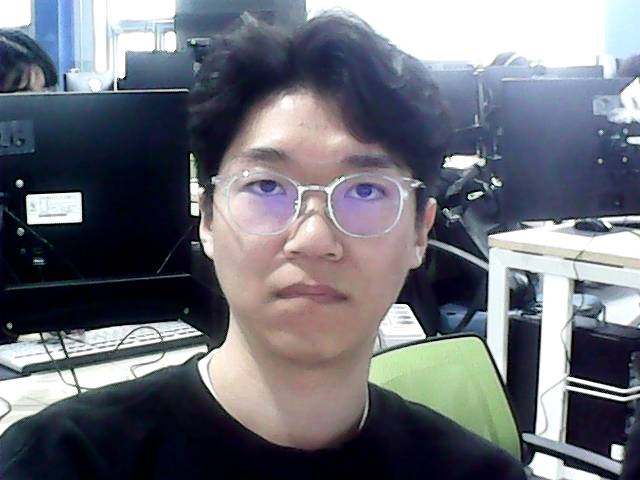

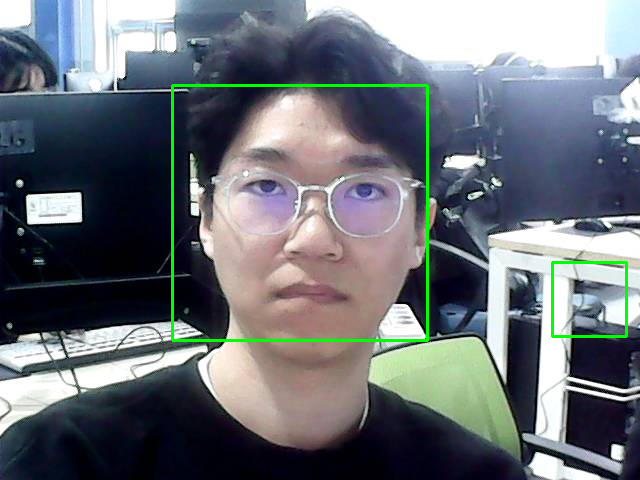

In [5]:
# 필요한 라이브러리를 설치
!pip install opencv-python

# OpenCV 불러오기
import cv2
import numpy as np
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# JavaScript를 사용하여 웹캠에 접근
def take_photo(filename='photo.jpg', quality=0.7):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# 사진 촬영
from IPython.display import Image
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Display the image which was just taken.
    display(Image(filename))
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

# 얼굴 감지
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# 이미지 불러오기
img = cv2.imread(filename)

# Grayscale 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 감지 (파라미터 조절)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# 감지된 얼굴에 초록색 사각형 그리기
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)  # (0,255,0)은 초록색을 의미합니다.

# 감지된 얼굴을 보여주기
from google.colab.patches import cv2_imshow
cv2_imshow(img)